# Задание 1.

Разбейте текст ниже на предложения с помощью библиотеки razdel. Токенизируйте 4-е (индекс 3 если считать с 0) предложение с помощью word_tokenizer из nltk.
Разберите каждый отдельный токен этого предложения через pymorphy. Для каждого слова выберите последний по вероятности доступный разбор (если разбор только один, то выберите его) и выделите только части речи. Посчитайте сколько раз встречается тэг NOUN. Получившееся число вставьте в форму

In [11]:
!pip install razdel pymorphy2

  Using cached pymorphy2-0.9.1-py3-none-any.whl (55 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  Using cached pymorphy2_dicts_ru-2.4.417127.4579844-py2.py3-none-any.whl (8.2 MB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=fe887b6d9bc4e1d3086fcab1b4bc169b6c7fe592614f46a117be8f01099801d2
  Stored in directory: /Users/mnefedov/Library/Caches/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [12]:
text = """
Diablo — одна из самых известных видеоигровых серий. Каждую новую часть ждут с нетерпением
Первая Diablo изменила индустрию видеоигр — пусть и не создала новый жанр, но стала в нем главным ориентиром. Эта игра вышла в 1997 году. Тогда в портфолио студии-разработчика Blizzard Entertainment уже была стратегия WarCraft и несколько игр для консоли Sega Genesis.

RPG тех лет были сложными для освоения. Во-первых, управлять чаще всего нужно было группой из нескольких персонажей — каждый со своими характеристиками и способностями. Во-вторых, чтобы узнать обо всех возможностях игры, нередко приходилось изучать руководства и инструкции.

Diablo пыталась сделать жанр ролевых игр доступным для широкой аудитории. Под контролем оказывался не отряд приключенцев, а один герой. Вместо десятка характеристик и навыков — четыре параметра: сила, ловкость, живучесть и энергия, которая отвечает за магические способности. Эти атрибуты и нужно было улучшать. А еще — открывать новые заклинания и способности с помощью книг, которые выпадали из поверженных врагов.

"""

In [13]:
from razdel import sentenize

In [14]:
sents = list(sentenize(text))

In [15]:
chosen_sent = sents[3].text

In [16]:
chosen_sent

'Тогда в портфолио студии-разработчика Blizzard Entertainment уже была стратегия WarCraft и несколько игр для консоли Sega Genesis.'

In [17]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mnefedov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
tokens = word_tokenize(chosen_sent)

In [19]:
tokens

['Тогда',
 'в',
 'портфолио',
 'студии-разработчика',
 'Blizzard',
 'Entertainment',
 'уже',
 'была',
 'стратегия',
 'WarCraft',
 'и',
 'несколько',
 'игр',
 'для',
 'консоли',
 'Sega',
 'Genesis',
 '.']

In [20]:
from pymorphy2 import MorphAnalyzer
from collections import Counter
m = MorphAnalyzer()

In [24]:
Counter([str(m.parse(t)[-1].tag.POS) for t in tokens])

Counter({'ADVB': 1,
         'NOUN': 7,
         'None': 6,
         'COMP': 1,
         'VERB': 1,
         'NUMR': 1,
         'GRND': 1})

## Задание 2.

Вам даны две последовательности с правильными ответами для бинарной классификации и для многоклассовой классификации. А также функция, которая генерирует случайные предсказание заданной длины и с заданным количеством классов.

а) Сгенерируйте 5 тысяч случайных предсказаний для бинарной классификации и сравните каждое случайное предсказание с правильными ответами для бинарной классификации. Расчитайте точность каждого предсказания и рассчитайте усредненную точность на всех предсказаниях. Округлите полученную точность до 2 знака после запятой и вставьте в форму для экзамена в соответствующее поле.

б) Сгенерируйте 5 тысяч случайных предсказаний для многлассовой классификации и сравните каждое случайное предсказание с правильными ответами для многоклассовой классификации. Расчитайте полноту каждого предсказания (используя макроусреднение по классам) и рассчитайте усредненную полноту на всех предсказаниях. Округлите полученную полноту до 2 знака после запятой и вставьте в форму для экзамена в соответствующее поле.


*при вызове функции для генерации предсказаний укажите нужное количество классов (2 или 5) и нужную длину последовательности (10 для бинарной, 15 для многоклассовой)*

In [25]:
binary_true = [1,1,1,1,0,1,0,1,0,1]
multiclass_true = [1,2,0,0,3,4,0,1,2,2,4,0,0,1,3]

In [26]:
import numpy as np
def predict_random(n_classes: int, length: int):
    preds = []
    for i in range(length):
        preds.append(np.random.randint(0,n_classes))
    return preds

In [27]:
# predict_random(2, 10)
# predict_random(5, 15)

In [28]:
from sklearn.metrics import precision_score, recall_score

In [49]:
precs = []

for i in range(5000):
    preds = predict_random(2, 10)
    score = precision_score(binary_true, preds, zero_division=0)
    precs.append(score)
print(np.mean(precs).round(2))

0.7


In [50]:
precs = []

for i in range(5000):
    preds = predict_random(5, 15)
    score = precision_score(multiclass_true, preds, average='macro', zero_division=0)
    precs.append(score)
print(np.mean(precs).round(2))

0.19


In [ ]:
len(multiclass_true)

15

## Задание 3

Загрузите токенизатор и модель 'distilbert-base-uncased'. Токенизируйте и рассчитайте векторные представления для двух приведенных ниже текстов. Усредните векторные представления токенов каждого из текстов так, чтобы для каждого из текстов получился вектор размером 768.
Рассчитайте косинусное расстояние между двумя этим векторами, округлите его до 2 знака после запятой и вставьте число в форму.

Когда я делал сам, то использовал следующее ->

In [51]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

In [31]:
from transformers import DistilBertTokenizer, DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('sentence-transformers/LaBSE')
model = DistilBertModel.from_pretrained("sentence-transformers/LaBSE")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.
You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at sentence-transformers/LaBSE were not used when initializing DistilBertModel: ['encoder.layer.5.attention.self.value.bias', 'encoder.layer.2.attention.output.dense.weight', 'encoder.layer.6.intermediate.dense.weight', 'encoder.layer.10.output.LayerNorm.bias', 'encoder.layer.3.output.dense.weight', 'encoder.layer.8.attention.self.value.weight', 'encoder.layer.10.output.LayerNorm.weight', 'encoder.layer.8.attention.self.key.weight', 'encoder.layer.10.attention.self.value.bias', 'encoder.layer.7.attention.self.key.weight', 'encoder.layer.5.output.dense.weight', 'encoder.layer.5.attention.output.dense.weight', 'encoder.layer.7.output.dense.weight', 'encoder.layer.1.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.2.output.dense.bias', 'encoder.layer.4.output.LayerNorm.weight', 'encoder.layer.6.attention.self.query.weight', 'encoder.layer.10.attention.self.value.weight', 'encoder.layer.8.output.LayerNorm.weight', 'enc

Some weights of DistilBertModel were not initialized from the model checkpoint at sentence-transformers/LaBSE and are newly initialized: ['transformer.layer.8.attention.q_lin.bias', 'transformer.layer.7.ffn.lin1.weight', 'transformer.layer.5.attention.q_lin.weight', 'transformer.layer.11.attention.out_lin.bias', 'transformer.layer.1.output_layer_norm.bias', 'transformer.layer.6.output_layer_norm.weight', 'transformer.layer.2.sa_layer_norm.weight', 'transformer.layer.7.attention.k_lin.bias', 'transformer.layer.6.attention.v_lin.bias', 'transformer.layer.6.ffn.lin1.weight', 'transformer.layer.5.attention.out_lin.weight', 'transformer.layer.8.sa_layer_norm.bias', 'transformer.layer.1.ffn.lin1.weight', 'transformer.layer.1.ffn.lin1.bias', 'transformer.layer.11.output_layer_norm.bias', 'transformer.layer.10.attention.q_lin.weight', 'transformer.layer.8.ffn.lin2.bias', 'transformer.layer.11.sa_layer_norm.bias', 'transformer.layer.3.sa_layer_norm.bias', 'transformer.layer.5.ffn.lin1.bias', 't

In [32]:
text1 = "Diablo пыталась сделать жанр ролевых игр доступным для широкой аудитории."
text2 = "Diablo tried to make the role-playing game genre accessible to a wider audience."
# text2 = "Diablo probeerde het rollenspelgenre toegankelijk te maken voor een breder publiek."

In [53]:
def encode(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input).last_hidden_state # эмбединги для всех токенов
    return np.mean(output.detach().numpy(), axis=1) # усредняем токены в один эмбединг текста

In [57]:
encoded_input = tokenizer(text1, return_tensors='pt')
output = model(**encoded_input)

In [59]:
output.last_hidden_state.shape

torch.Size([1, 16, 768])

In [60]:
np.round(cosine_similarity(encode(text1), encode(text2)), 2)

array([[0.75]], dtype=float32)

In [65]:
# !pip install sentence_transformers

In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/LaBSE')
embeddings = model.encode(sentences)
print(embeddings)

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/Users/mnefedov/miniforge3/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/mnefedov/miniforge3/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

[[ 0.02882481 -0.00602381 -0.05947006 ... -0.03002251 -0.02960701
   0.0006748 ]
 [-0.0555023   0.02546485 -0.02157256 ...  0.02932104  0.01150038
  -0.00848792]]


Из sentence-embeddings можно вытащить эмбединги токенов, усреднить их и посчитать близость. Результат получается другой (наверное из-за разницы внутри пайплайна)

In [10]:
text1 = "Diablo пыталась сделать жанр ролевых игр доступным для широкой аудитории."
text2 = "Diablo tried to make the role-playing game genre accessible to a wider audience."
sentences = [text1, text2]

embeddings = model.encode(sentences, output_value='token_embeddings') 


cosine_similarity(embeddings[0].detach().cpu().numpy().mean(0).reshape(1, -1), 
                  embeddings[1].detach().cpu().numpy().mean(0).reshape(1, -1))

array([[0.941665]], dtype=float32)

По умолчанию sentence-transformers выдает один вектор (pooled), он отличается от простого усредненного и поэтому результат будет тоже другой

In [7]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Dense({'in_features': 768, 'out_features': 768, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
  (3): Normalize()
)

In [6]:
text1 = "Diablo пыталась сделать жанр ролевых игр доступным для широкой аудитории."
text2 = "Diablo tried to make the role-playing game genre accessible to a wider audience."
sentences = [text1, text2]

embeddings = model.encode(sentences) 


cosine_similarity([embeddings[0]], 
                  [embeddings[1]])

array([[0.9101566]], dtype=float32)

Все варианты правильные

# Задание 4

Используя модель "mosaicml/mpt-7b-chat"* (huggingface), сгенерируйте продолжение следующего текста: 
"Tell me a short story about linguistics:\n".

Используйте следующее параметры при генерации: минимальная длина продолжения - 20 токенов, максимальная длина продолжения - 40 токенов, отсутствие повторов длиной 3 токена, отсутствие семплирование (выбирается только самый вероятный токен).

Вставьте сгенерированный текст в форму целиком (кавычки лучше не включать, но сработает и с ними). Не включайте в ответ изначальный текст. 

*Для модели вам понадобится квантизация

In [62]:
# %pip install transformers accelerate --upgrade
# !pip install -i https://pypi.org/simple/ bitsandbytes

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
quantization_config = BitsAndBytesConfig(
        load_in_8bit=True
    )
import torch
model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path='mosaicml/mpt-7b-chat',
                                             quantization_config=quantization_config,
                                             cache_dir='./models')
tokenizer = AutoTokenizer.from_pretrained("mosaicml/mpt-7b-chat")

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [8]:
from transformers import pipeline

pipe = pipeline('text-generation', model=model, tokenizer=tokenizer)

with torch.autocast('cuda', dtype=torch.bfloat16):
    print(
    pipe('Tell me a short story about linguistics:\n',
          min_new_tokens=20, max_new_tokens=40, do_sample=False, no_repeat_ngram_size=3,
            use_cache=True))


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


[{'generated_text': 'Tell me a short story about linguistics:\n\nIn the small town of Babel, there lived a linguist named Dr. Grammar. Dr. G was a brilliant scholar, and he spent his days studying the intricacies of language.'}]


# Задание 5

In [61]:
# !pip install diffusers

In [3]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, StableDiffusionXLPipeline
from diffusers.utils import load_image
from PIL import Image
from torchvision import transforms
to_512 = transforms.Resize(512)
to_256 = transforms.Resize(256)

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [4]:
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
_ = pipe.to("cuda")

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [28]:
prompt = 'a hand with 5 fingers, bright colors'

generator = generator=torch.Generator('cuda').manual_seed(123124)

gen_image = pipe(prompt,
             generator=generator,
             height=1024, # размер итоговой картинки
             width=1024, # размер итоговой картинки
             guidance_scale=9.0, # значимость текстового промпта в диффузии, можно увеличить чтобы было больше похоже на промпт
             num_inference_steps=20,
             negative_prompt='dark', # количество шагов диффузии, чем больше тем лучше, но и дольше; поздние шаги изменяют все меньше и меньше
).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

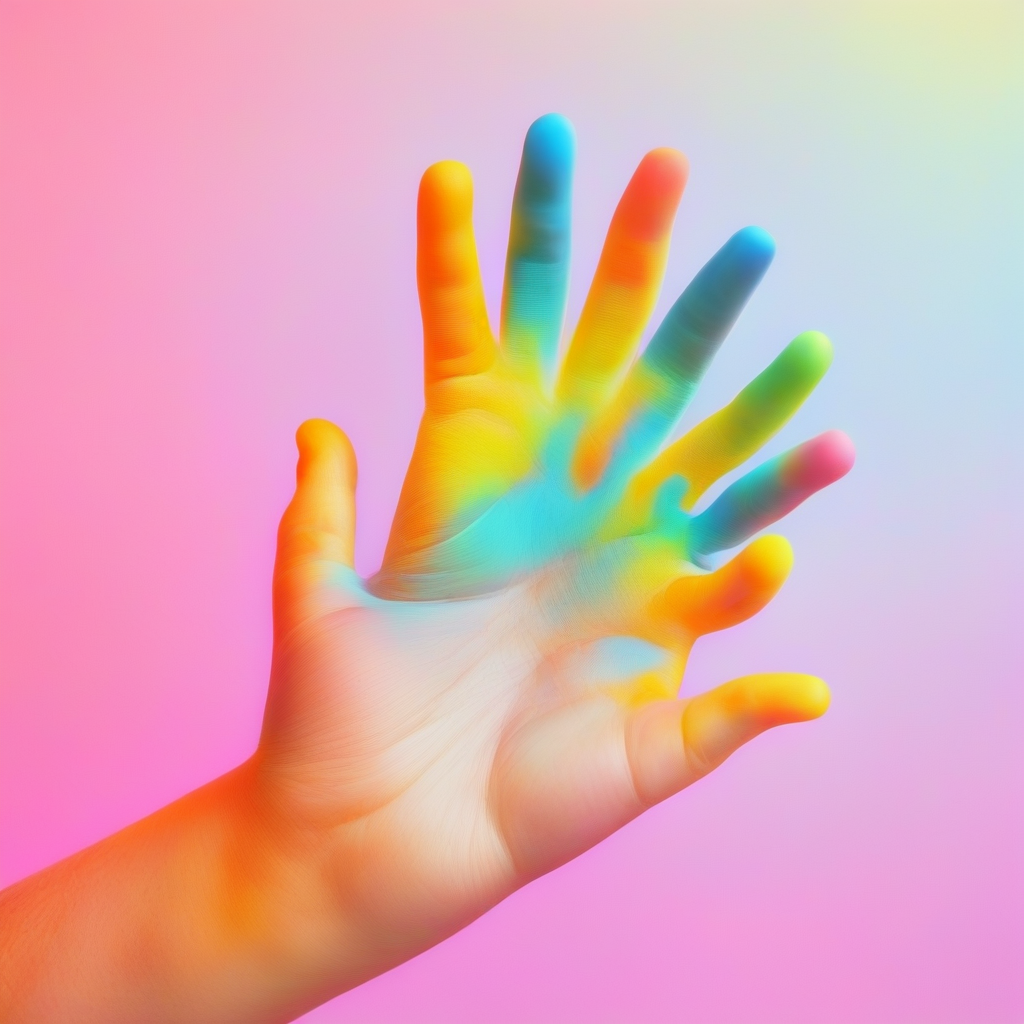

In [29]:
gen_image